In [3]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

import csv

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [4]:
file_path = "/home/jlab/ExternalDrive/Seagate/Data/daq_rate_test/"
run_num = [x for x in range(18278,
                            18279)]
print(run_num)
#calotext = "amc1311"
calotext = "eb"
file_name = "run_"+str(run_num[0])+"_"+calotext+".txt"

dfi = pandas.read_csv(file_path+file_name, header=None,delimiter=' ')
df = dfi.loc[dfi[0] != 0]
print(file_name)
print(len(df),len(dfi))

for i,runi in enumerate(run_num):
    if i >0.5:
        try:
            file_name = "run_"+str(runi)+"_"+calotext+".txt"
            print(file_name)
            dfi = pandas.read_csv(file_path+file_name, header=None,delimiter=' ')
            df = df.append(dfi.loc[dfi[0] != 0])
        except:
            print("ERROR: File", file_name, "not found.")
            run_num.pop(i)
        print(len(df),len(dfi))
        
run_num_txt = str(run_num)

[18278]
run_18278_eb.txt
2354 2360


In [5]:
print(df.head())
df.describe()

               0              1
0  429740.450955  1532713784043
1  430981.590881  1532713784715
2  421584.710264  1532713785713
3  392792.590600  1532713786735
4  395068.634491  1532713787717


,0,1
count,2.354000e+03,2.354000e+03
mean,4.140796e+05,1.532715e+12
std,8.049207e+04,6.803765e+05
min,2.462986e+01,1.532714e+12
25%,3.937386e+05,1.532714e+12
50%,4.140183e+05,1.532715e+12
75%,4.302913e+05,1.532716e+12
max,1.224723e+06,1.532716e+12


[ 0.         39.32016667] minutes
[0.         0.65533611] hours


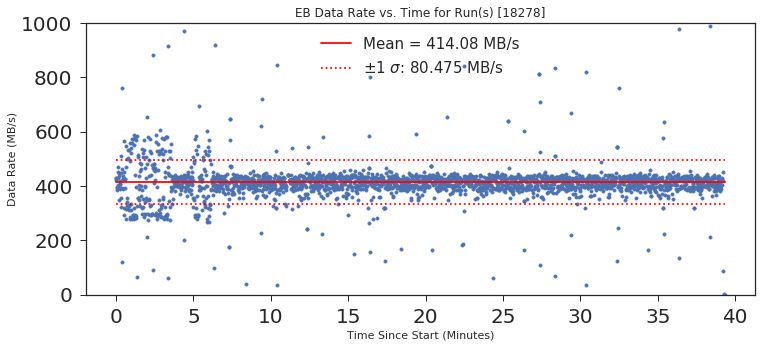

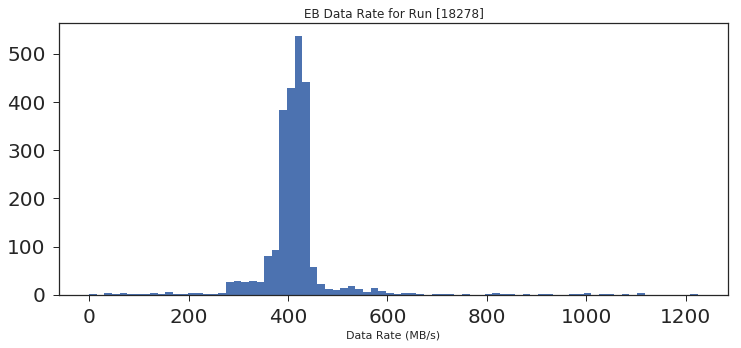

In [6]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.scatter(y = df[0]/1000, x = (df[1] - list(df[1])[0])/1000/60,label='',marker='.')

plt.xlabel("Time Since Start (Minutes)")
plt.ylabel("Data Rate (MB/s)")
plt.title(calotext.upper()+" Data Rate vs. Time for Run(s) "+ run_num_txt)

x = np.linspace(0, (- list(df[1])[0] + np.amax(list(df[1])))/1000/60, 2)
print(x,"minutes")
print(x/60,"hours")
ax.plot(x, np.mean(df[0]/1000)+x*0,color='red',label = "Mean = "+str(round(np.mean(df[0])/1000,3))+" MB/s")
ax.plot(x, (np.mean(df[0]/1000) + np.std(df[0]/1000)) +x*0,color='red',
        label = '$\pm 1$ $\sigma$: '+str(round(np.std(df[0])/1000,3))+' MB/s',linestyle='dotted')
ax.plot(x, (np.mean(df[0]/1000) - np.std(df[0]/1000)) +x*0,color='red',label = '',linestyle='dotted')


plt.legend(fontsize=15)
plt.ylim(0,1000)
plt.savefig("./images/daq/rateTest_"+run_num_txt+".png",bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(12, 5))
plt.title(calotext.upper()+" Data Rate for Run "+ run_num_txt)
plt.hist(df[0]/1000, bins=80)
plt.xlabel("Data Rate (MB/s)")
plt.savefig("./images/daq/rateTestHist_"+run_num_txt+".png",bbox_inches='tight')
plt.show()

In [7]:
file_path_ny_16 = "18282"
file_path_nn_16 = "18280"
file_path_yn_16 = "18283"

file_path_ny_32 = "18286"
file_path_nn_32 = "18285"
file_path_yn_32 = "18284"

file_path_ny_64 = "18287"
file_path_nn_64 = "18288"
file_path_yn_64 = "18289"

file_path_ny_90 = "18293"
file_path_nn_90 = "18291"
file_path_yn_90 = "18290"

file_path_ny_140 = "18294"
file_path_nn_140 = "18295"
file_path_yn_140 = "18296"

file_path_ny_190 = "18302"
file_path_nn_190 = "18300"
file_path_yn_190 = "18301"

file_path_ny_260 = "18303"
file_path_nn_260 = "18304"
file_path_yn_260 = "18305"

nn_vec = [file_path_nn_16,file_path_nn_32,file_path_nn_64,file_path_nn_90,file_path_nn_140,file_path_nn_190,file_path_nn_260]
ny_vec = [file_path_ny_16,file_path_ny_32,file_path_ny_64,file_path_ny_90,file_path_ny_140,file_path_ny_190,file_path_ny_260]
yn_vec = [file_path_yn_16,file_path_yn_32,file_path_yn_64,file_path_yn_90,file_path_yn_140,file_path_yn_190,file_path_yn_260]

postsamp_vec = [16, 32, 64, 90, 140, 190, 260]

[5.600803382606195, 5.6518005358995955, 5.753794842486399, 5.836665216588176, 5.996031320630056, 6.155397424671936, 6.378509970330567]
0.0031873220808375916 5.549806229312793
[7.487006832363773, 8.26887936277543, 9.832624423598743, 11.103167285517685, 13.54651894305411, 15.989870600590539, 19.410562921141533]
0.04886703315072854 6.705134301952116
[6.4214490569045335, 6.673103091859875, 7.176411161770558, 7.585348968572988, 8.37176782780843, 9.158186687043873, 10.25917308997349]
0.015728377184708847 6.1697950219491915


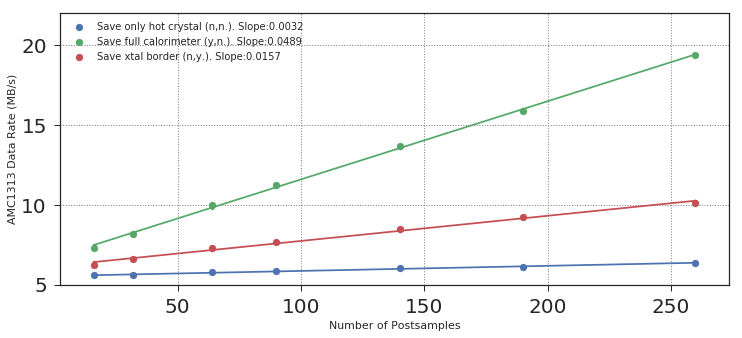

In [8]:
calotext = "amc1313"

mean_nn = []
for i, run_num in enumerate(nn_vec):
    file_path = "/home/jlab/ExternalDrive/Seagate/Data/daq_rate_test/"

    file_name = "run_"+str(run_num)+"_"+calotext+".txt"
    
    df = pandas.read_csv(file_path+file_name, header=None,delimiter=' ')
    df = df.loc[df[0] != 0]
    mean_nn.append(np.mean(df[0]/1024))
    
mean_ny = []
for i, run_num in enumerate(ny_vec):
    file_path = "/home/jlab/ExternalDrive/Seagate/Data/daq_rate_test/"
    file_name = "run_"+str(run_num)+"_"+calotext+".txt"
    
    df = pandas.read_csv(file_path+file_name, header=None,delimiter=' ')
    df = df.loc[df[0] != 0]
    mean_ny.append(np.mean(df[0]/1024))
    
mean_yn = []
for i, run_num in enumerate(yn_vec):
    file_path = "/home/jlab/ExternalDrive/Seagate/Data/daq_rate_test/"
    file_name = "run_"+str(run_num)+"_"+calotext+".txt"
    
    df = pandas.read_csv(file_path+file_name, header=None,delimiter=' ')
    df = df.loc[df[0] != 0]
    mean_yn.append(np.mean(df[0]/1024))
    
from scipy import stats
linevec = []
slopevec = []

for i in [mean_nn, mean_yn, mean_ny]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(postsamp_vec,i)
    line = [slope*xi+intercept for xi in postsamp_vec]
    linevec.append(line)
    slopevec.append(slope)
    print(line)
    print(slope,intercept)
    
fig, ax = plt.subplots(figsize=(12, 5))
plt.scatter(x=postsamp_vec,y=mean_nn, label = "Save only hot crystal (n,n.). Slope:"+str(round(slopevec[0],4)))
plt.scatter(x=postsamp_vec,y=mean_yn, label = "Save full calorimeter (y,n.). Slope:"+str(round(slopevec[1],4)))
plt.scatter(x=postsamp_vec,y=mean_ny, label = "Save xtal border (n,y.). Slope:"+str(round(slopevec[2],4)))
plt.plot(postsamp_vec, linevec[0], '.b-')
plt.plot(postsamp_vec, linevec[1], '.g-')
plt.plot(postsamp_vec, linevec[2], '.r-')
plt.ylabel(calotext.upper()+" Data Rate (MB/s)")
plt.xlabel("Number of Postsamples")
plt.legend()
plt.ylim(5,22)
ax.grid(color='grey', linestyle=':', linewidth=1)
plt.show()

In [9]:
print(mean_yn)
print(mean_ny)
print(mean_nn)

[7.309147068811678, 8.165650846665024, 10.009637232128565, 11.22814916587381, 13.70918521072099, 15.868049196697246, 19.348811648144487]
[6.230342545623635, 6.61739526394918, 7.286827095794463, 7.696929405188682, 8.485609839834565, 9.230474326753686, 10.09786140678953]
[5.583566302301869, 5.619642425258711, 5.7760291514173625, 5.851754697913041, 6.044869138072577, 6.137600601123072, 6.359540377126296]


[23.60851068208639, 31.17949161941135, 42.295319825600906, 47.883176368029325, 55.90643028627763, 61.32101353453994, 67.13213972633733]
[14.759649970532536, 18.960590059372606, 27.201886274105178, 31.449704742235838, 38.10274126868922, 41.82981025370841, 47.81146465003759]


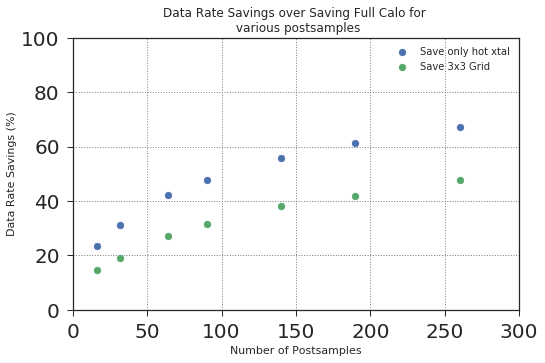

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
rationn = [100 - x/mean_yn[i]*100 for i,x in enumerate(mean_nn)]
rationy = [100 - x/mean_yn[i]*100 for i,x in enumerate(mean_ny)]
print(rationn)
print(rationy)
plt.scatter(y=rationn,x = postsamp_vec,label='Save only hot xtal')
plt.scatter(y=rationy,x = postsamp_vec,label='Save 3x3 Grid')
plt.title("Data Rate Savings over Saving Full Calo for \n various postsamples")
plt.xlabel("Number of Postsamples")
plt.ylabel("Data Rate Savings (%)")
plt.legend()
plt.ylim(0,100)
plt.xlim(0,300)
ax.grid(color='grey', linestyle=':', linewidth=1)
plt.show()

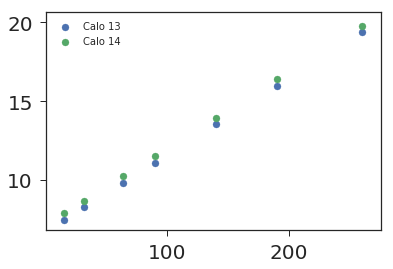

In [11]:
calo13yn = [7.487006832363773, 8.26887936277543, 9.832624423598743, 11.103167285517685, 13.54651894305411, 15.989870600590539, 19.410562921141533]
calo14yn = [7.905091203531212, 8.685329033981658, 10.245804694882551, 11.513691169364526, 13.951934389522169, 16.390177609679814, 19.803718117900516]
plt.scatter(x=postsamp_vec,y=calo13yn, label = "Calo 13")
plt.scatter(x=postsamp_vec,y=calo14yn, label = "Calo 14")
plt.legend()
plt.show()